In [1]:
import numpy as np
import numba as nb
from scipy.stats import maxwell
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from copy import copy
from matplotlib.widgets import Slider
from mpl_toolkits.axes_grid1 import make_axes_locatable
from tqdm import tqdm
from scipy.spatial import distance

In [3]:
NVAR = 5
PVAR = NVAR-1
N = 50
R = 0.15
GA = 0.2
RA = 10
PA = 1/30
dt = 0.01
ms = 5
PRED_NOISE = 0.02
RADIUS_PRED = 0.2
Niterations = 100
MAX_SPEED = 0.01/dt
PRED_SPEED = MAX_SPEED #NEW
DECAY_RATE = 0.995

<ipython-input-36-a6c033dd14e5>:16: RuntimeWarning: divide by zero encountered in log
  im = ax.imshow(np.log(data),cmap="hot", origin="Bottom", interpolation='none',extent=[bins[0],bins[-1],0,Niterations],aspect="auto")


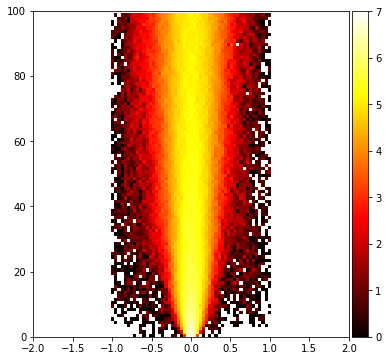

In [36]:
rab = np.load("runs/{}_{}_{}_{}_rabbits.npy".format(N, 49, Niterations, 50))
pred = np.load("runs/{}_{}_{}_{}_pred.npy".format(N, 49, Niterations, 50))

rab_r = np.sqrt(rab[:,:,:,0]**2 + rab[:,:,:,1]**2)
rab_V = np.diff(rab_r,axis=1)/dt

binning = 101
bins = np.linspace(-2,2,binning+1)
data = np.zeros((Niterations, binning))

for i in range(Niterations-1):
    counts, _ = np.histogram(rab_V[:,i,:],bins=bins)
    data[i,:] = counts
    
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(np.log(data),cmap="hot", origin="Bottom", interpolation='none',extent=[bins[0],bins[-1],0,Niterations],aspect="auto")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)

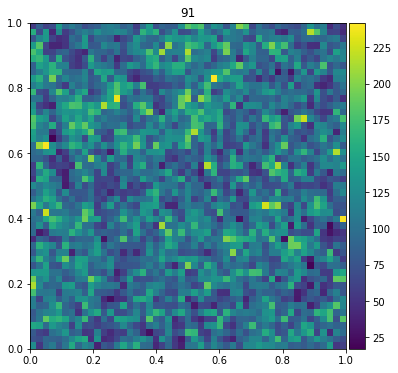

In [35]:
bins=np.linspace(0,1,50)

hist= np.histogram2d(rab[:,:,:,0].flatten(),rab[:,:,:,1].flatten(),bins=[bins,bins])
fig, ax = plt.subplots(figsize=(6,6))
im = ax.imshow(hist[0],origin="Bottom",extent =[0,1,0,1], interpolation='none',aspect="auto")
divider = make_axes_locatable(ax)
ax.set_title(i)
cax = divider.append_axes("right", size="5%", pad=0.05)
fig.colorbar(im, cax=cax)

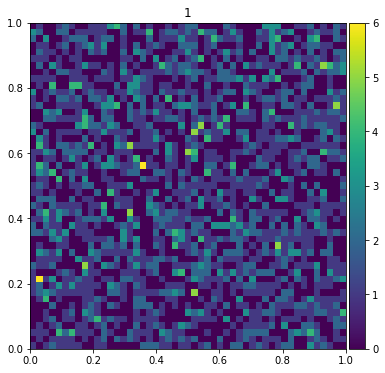

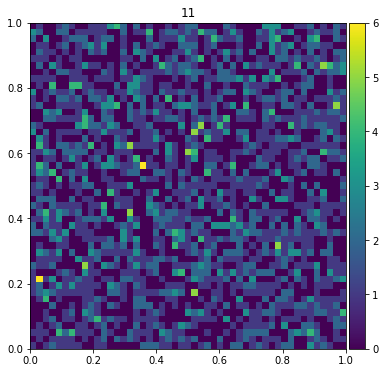

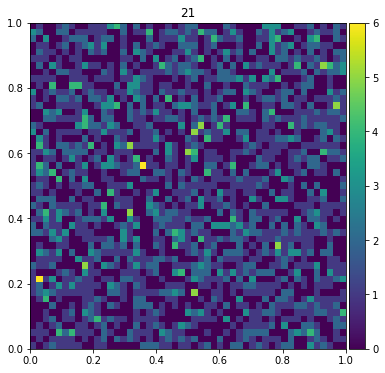

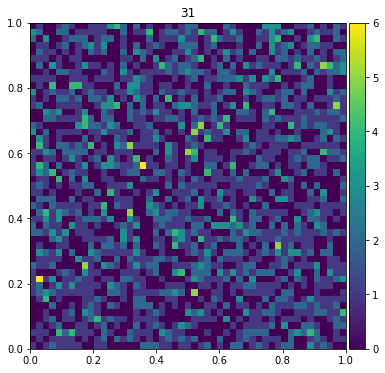

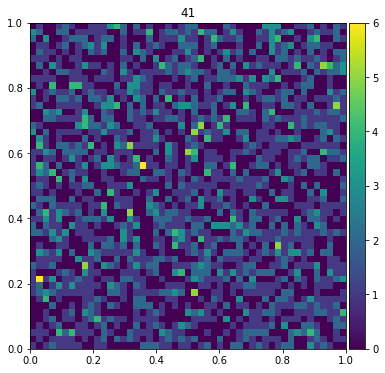

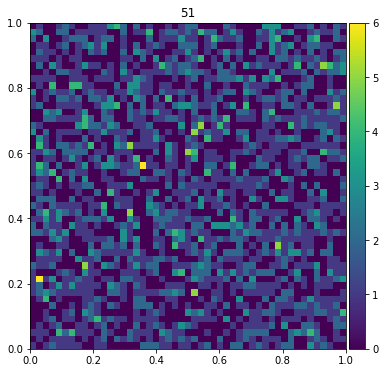

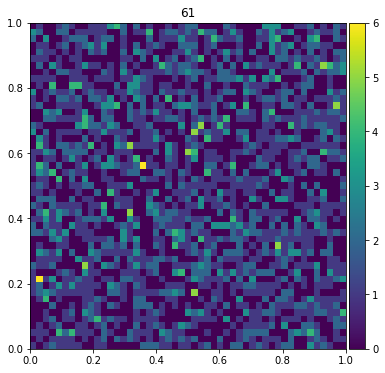

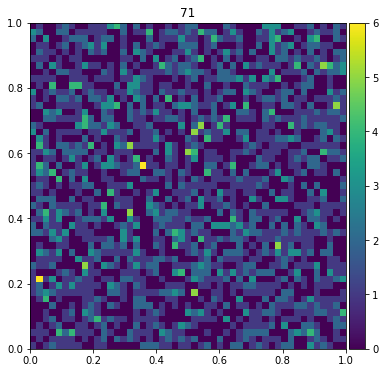

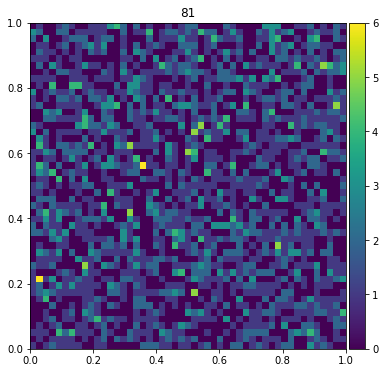

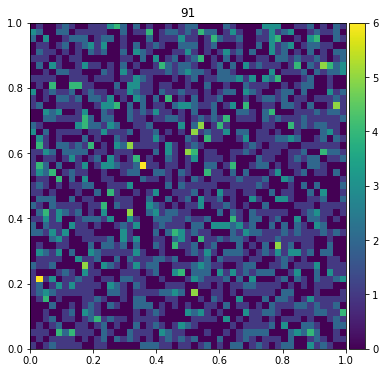

In [34]:
bins=np.linspace(0,1,50)
rab = np.load("runs/{}_{}_{}_{}_rabbits.npy".format(N, 1, Niterations, 50))
for i in range(1,Niterations,10):
    hist= np.histogram2d(rab[:,-1,:,0].flatten(),rab[:,-1,:,1].flatten(),bins=[bins,bins])
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(hist[0],origin="Bottom",extent =[0,1,0,1], interpolation='none',aspect="auto")
    divider = make_axes_locatable(ax)
    ax.set_title(i)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)

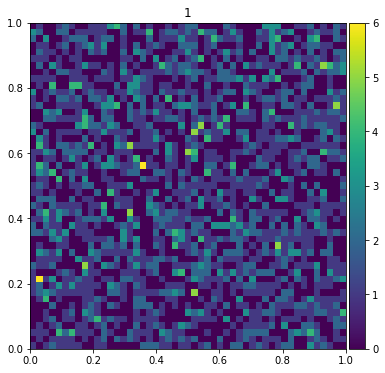

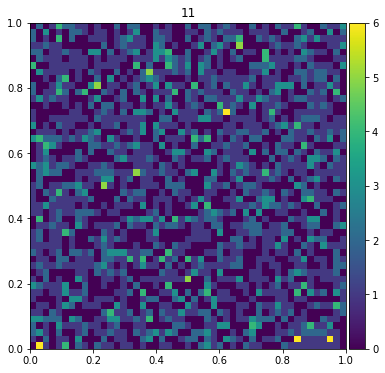

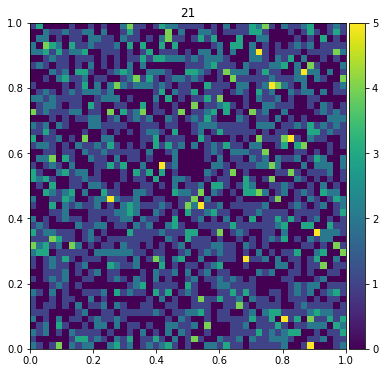

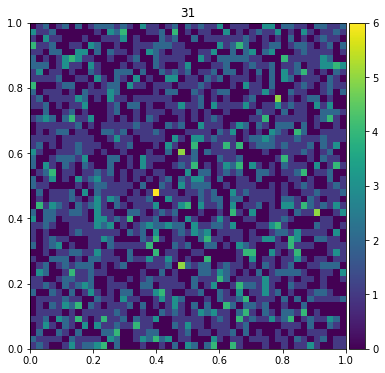

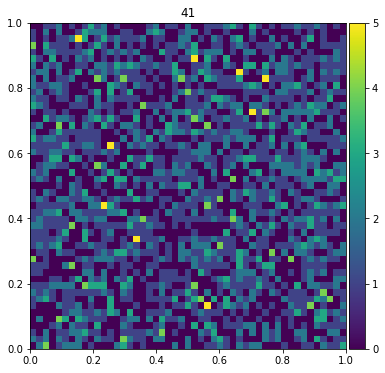

In [31]:
#MAke ANIMATION
bins=np.linspace(0,1,50)
for i in range(1,N,10):
    rab = np.load("runs/{}_{}_{}_{}_rabbits.npy".format(N, i, Niterations, 50))
    hist= np.histogram2d(rab[:,-1,:,0].flatten(),rab[:,-1,:,1].flatten(),bins=[bins,bins])
    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(hist[0],origin="Bottom",extent =[0,1,0,1], interpolation='none',aspect="auto")
    divider = make_axes_locatable(ax)
    ax.set_title(i)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)